In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/날씨빅데이터티이임/최종데이터.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1578960 entries, 0 to 1578959
Data columns (total 32 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Unnamed: 0   1578960 non-null  int64  
 1   날짜           1578960 non-null  int64  
 2   날짜_연도        1578960 non-null  int64  
 3   날짜_월         1578960 non-null  int64  
 4   날짜_일         1578960 non-null  int64  
 5   시간_분         1578960 non-null  int64  
 6   관측소지점        1578960 non-null  int64  
 7   경도           1578960 non-null  float64
 8   위도           1578960 non-null  float64
 9   자외선지수        1578960 non-null  float64
 10  파랑_가시밴드      1578960 non-null  float64
 11  초록_가시밴드      1578960 non-null  float64
 12  빨강_가시밴드      1578960 non-null  float64
 13  식생_가시밴드      1578960 non-null  float64
 14  권운_밴드        1578960 non-null  float64
 15  눈/얼음_가시밴드    1578960 non-null  float64
 16  야간안개/하층운_밴드  1578960 non-null  float64
 17  상층_수증기_밴드    1578960 non-null  float64
 18  중층

In [ ]:
df_1 = df[(df['날짜_월']==5)|(df['날짜_월']==6)|(df['날짜_월']==7)]

In [ ]:
df1 = df_1.drop(['날짜', '날짜_연도', '날짜_월', '날짜_일', '시간_분', '경도', '위도', '위성천정각', '관측고도', '계절'], axis=1)

In [ ]:
df1.reset_index(drop=True, inplace = True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397440 entries, 0 to 397439
Data columns (total 22 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   397440 non-null  int64  
 1   관측소지점        397440 non-null  int64  
 2   자외선지수        397440 non-null  float64
 3   파랑_가시밴드      397440 non-null  float64
 4   초록_가시밴드      397440 non-null  float64
 5   빨강_가시밴드      397440 non-null  float64
 6   식생_가시밴드      397440 non-null  float64
 7   권운_밴드        397440 non-null  float64
 8   눈/얼음_가시밴드    397440 non-null  float64
 9   야간안개/하층운_밴드  397440 non-null  float64
 10  상층_수증기_밴드    397440 non-null  float64
 11  중층_수증기_밴드    397440 non-null  float64
 12  하층_수증기_밴드    397440 non-null  float64
 13  구름상_밴드       397440 non-null  float64
 14  오존_밴드        397440 non-null  float64
 15  대기창_밴드       397440 non-null  float64
 16  깨끗한_대기창_밴드   397440 non-null  float64
 17  오염된_대기창_밴드   397440 non-null  float64
 18  이산화탄소_밴드     397440 non-

In [ ]:
del df1['Unnamed: 0']

In [ ]:
pd.set_option('display.max_columns', 30)

In [ ]:
df1.head()

,관측소지점,자외선지수,파랑_가시밴드,초록_가시밴드,빨강_가시밴드,식생_가시밴드,권운_밴드,눈/얼음_가시밴드,야간안개/하층운_밴드,상층_수증기_밴드,중층_수증기_밴드,하층_수증기_밴드,구름상_밴드,오존_밴드,대기창_밴드,깨끗한_대기창_밴드,오염된_대기창_밴드,이산화탄소_밴드,태양천정각,대기외일사량,지면타입,Band1,Band2,Band3,Band4,Band5
0,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,277.64337,241.10364,252.81774,260.87956,276.05914,252.91737,277.63245,277.03649,275.67037,262.71147,130.35092,-6.11462,0,0.0,0.0,277.64337,251.600313,270.337882
1,105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,287.64354,237.44891,246.82269,256.06092,284.76266,256.69212,286.82011,287.23821,285.51819,269.40510,126.43187,-5.60867,3,0.0,0.0,287.64354,246.777507,278.406065
2,108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,277.32743,238.35866,248.32240,257.48046,278.59032,253.85590,281.28558,281.42512,280.03692,266.81080,126.31564,-5.59822,3,0.0,0.0,277.32743,248.053840,273.667440
3,112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,278.71774,238.44819,248.14894,257.41386,280.26998,254.78101,283.03827,283.39275,282.06360,268.05385,126.36437,-5.60546,3,0.0,0.0,278.71774,248.003663,275.266577
4,115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,281.88250,233.40607,241.62566,250.50873,275.90815,251.68704,277.82840,278.25056,275.71853,262.56565,126.91833,-5.66707,4,0.0,0.0,281.88250,241.846820,270.326388


In [ ]:
# 파랑, 초록, 빨강, 식생 가시밴드 (단위x)
df1['Band1'] = df1.iloc[:, 2:6].mean(axis=1)
# 권운, 눈/얼음 가시밴드 (단위x)
df1['Band2'] = df1.iloc[:,  6:8].mean(axis=1)
# 단파적외채널(야간안개/하층운, 단위 K(캘빈))
df1['Band3'] = df1.iloc[:, 8:9].mean(axis=1)
# 수증기채널(상,중,하, 단위 K(캘빈))
df1['Band4'] = df1.iloc[:, 9:12].mean(axis=1)
# 적외채널(구름상, 오존, 대기창, 깨끗, 오염된 대기창, 단위 K(캘빈))
df1['Band5'] = df1.iloc[:, 12:18].mean(axis=1)

In [ ]:
df1['태양천정각'].max()

131.63541

In [ ]:
df11 = df1[(df1['태양천정각'] >= 0) & (df1['태양천정각'] <= 45)]
df11['time'] = 1
df22 = df1[(df1['태양천정각'] > 45) & (df1['태양천정각'] <= 90)]
df22['time'] = 2
df33 = df1[(df1['태양천정각'] > 90) & (df1['태양천정각'] <= 135)]
df33['time'] = 3
df44 = df1[(df1['태양천정각'] > 135) & (df1['태양천정각'] <= 180)]
df44['time'] = 4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [ ]:
df_a = pd.concat([df11, df22, df33, df44])

In [ ]:
df_a = pd.get_dummies(df_a, columns = ['관측소지점'])
df_a = pd.get_dummies(df_a, columns = ['지면타입'])
df_a = pd.get_dummies(df_a, columns = ['time'])

In [ ]:
df_a.reset_index(drop = True, inplace = True)

In [ ]:
df_a

,자외선지수,파랑_가시밴드,초록_가시밴드,빨강_가시밴드,식생_가시밴드,권운_밴드,눈/얼음_가시밴드,야간안개/하층운_밴드,상층_수증기_밴드,중층_수증기_밴드,하층_수증기_밴드,구름상_밴드,오존_밴드,대기창_밴드,깨끗한_대기창_밴드,...,관측소지점_133,관측소지점_138,관측소지점_143,관측소지점_146,관측소지점_152,관측소지점_156,관측소지점_159,관측소지점_165,지면타입_0,지면타입_2,지면타입_3,지면타입_4,time_1,time_2,time_3
0,3.6,0.11500,0.09695,0.06914,0.08379,0.00091,0.03870,291.18537,236.60649,248.20684,258.83569,285.53103,258.04647,288.43553,288.80082,...,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1,3.0,0.12689,0.11405,0.10103,0.10788,0.00091,0.08707,302.65715,244.45571,253.55854,261.14683,292.20764,261.49417,295.01722,294.47815,...,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
2,3.3,0.13199,0.12033,0.08136,0.17641,0.00060,0.13545,300.56866,244.38156,253.73537,261.31056,291.88133,261.17936,294.73905,294.49134,...,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
3,4.1,0.13596,0.12261,0.10371,0.11716,0.00121,0.07546,295.63400,246.46729,255.31791,262.58053,287.82743,259.06856,290.51433,290.53341,...,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
4,1.8,0.14332,0.13116,0.08702,0.10205,0.00816,0.10900,296.59473,237.99797,251.07971,260.56927,283.18745,256.59290,285.38623,285.26797,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397435,0.1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,296.40523,236.12825,244.63256,253.42097,289.04391,264.53165,291.90287,290.09587,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
397436,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,290.86107,235.64237,244.82259,253.63901,285.61006,262.88449,288.27382,286.67481,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
397437,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,292.92384,236.60649,245.04310,253.49377,285.63638,262.57588,287.50208,284.96722,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
397438,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,286.67795,236.41609,246.52170,255.96927,284.69604,262.22936,287.43410,286.66069,...,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1


In [ ]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397440 entries, 0 to 397439
Data columns (total 46 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   자외선지수        397440 non-null  float64
 1   파랑_가시밴드      397440 non-null  float64
 2   초록_가시밴드      397440 non-null  float64
 3   빨강_가시밴드      397440 non-null  float64
 4   식생_가시밴드      397440 non-null  float64
 5   권운_밴드        397440 non-null  float64
 6   눈/얼음_가시밴드    397440 non-null  float64
 7   야간안개/하층운_밴드  397440 non-null  float64
 8   상층_수증기_밴드    397440 non-null  float64
 9   중층_수증기_밴드    397440 non-null  float64
 10  하층_수증기_밴드    397440 non-null  float64
 11  구름상_밴드       397440 non-null  float64
 12  오존_밴드        397440 non-null  float64
 13  대기창_밴드       397440 non-null  float64
 14  깨끗한_대기창_밴드   397440 non-null  float64
 15  오염된_대기창_밴드   397440 non-null  float64
 16  이산화탄소_밴드     397440 non-null  float64
 17  태양천정각        397440 non-null  float64
 18  대기외일사량       397440 non-

In [ ]:
X = df_a.drop(['자외선지수', '파랑_가시밴드', '초록_가시밴드', '빨강_가시밴드', '식생_가시밴드', '권운_밴드', '눈/얼음_가시밴드', '야간안개/하층운_밴드', '상층_수증기_밴드',
               '중층_수증기_밴드', '하층_수증기_밴드', '구름상_밴드', '오존_밴드', '대기창_밴드', '깨끗한_대기창_밴드', '오염된_대기창_밴드', '이산화탄소_밴드'], axis=1)
y = df_a['자외선지수']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 53)

In [ ]:
model = Lasso()
model.fit(X_train, y_train)

Lasso()

In [ ]:
y_pred = model.predict(X_test)
score1 = {'R2_score' : r2_score(y_test, y_pred)}
score2 = {'RMSE' : mean_squared_error(y_pred, y_test, squared = False)}

In [ ]:
score1

{'R2_score': 0.6595157842906407}

In [ ]:
score2

{'RMSE': 1.5021896179969945}

In [ ]:
# 최적의 하이퍼파라미터 찾기
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 0.5, 1, 10, 100]
for alpha in alpha_list:
  lasso = Lasso(alpha=alpha, max_iter = 10000)
  lasso.fit(X_train, y_train)
  train_score.append(lasso.score(X_train, y_train))
  test_score.append(lasso.score(X_test, y_test))

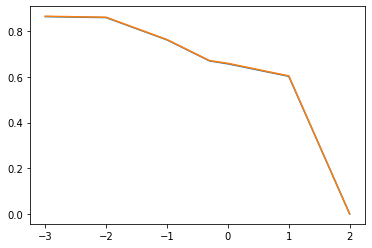

In [ ]:
# 입력한 알파 값 중 음수는 없으므로 0~1사이의 값 중 가장 작은 값이 점수가 가장 높은 것을 확인
import matplotlib.pyplot as plt
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [ ]:
param_value = {'alpha' : [0.0001, 0.01, 1, 2, 3, 4]}
modelLasso = Lasso()
gridSearch = GridSearchCV(modelLasso, param_grid = param_value, cv = 10)
gridSearch.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.048e+05, tolerance: 1.659e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.058e+05, tolerance: 1.664e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.01, 1, 2, 3, 4]})

In [ ]:
# L1 규제가 약할수록 값이 올라가는 것을 확인(알파 값이 작을수록 더 많은 변수 사용)
gridSearch.best_params_

{'alpha': 0.0001}

In [ ]:
gridSearch.best_score_

0.8648647713995941

In [ ]:
gridSearch.cv_results_

{'mean_fit_time': array([25.93089824,  7.88400202,  0.29608636,  0.2954139 ,  0.23808489,
         0.24207642]),
 'mean_score_time': array([0.0085357 , 0.00880184, 0.0083262 , 0.00834522, 0.00729017,
        0.00731924]),
 'mean_test_score': array([0.86486477, 0.85980904, 0.65725935, 0.65560866, 0.65285684,
        0.64900387]),
 'param_alpha': masked_array(data=[0.0001, 0.01, 1, 2, 3, 4],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.0001},
  {'alpha': 0.01},
  {'alpha': 1},
  {'alpha': 2},
  {'alpha': 3},
  {'alpha': 4}],
 'rank_test_score': array([1, 2, 3, 4, 5, 6], dtype=int32),
 'split0_test_score': array([0.86675028, 0.8612958 , 0.65752196, 0.65581974, 0.65302113,
        0.64912611]),
 'split1_test_score': array([0.86370072, 0.85870102, 0.65451306, 0.65287585, 0.65013849,
        0.64630096]),
 'split2_test_score': array([0.86366603, 0.85850892, 0.65839459, 0.6568698 , 0.65423996,
      

In [ ]:
model = Lasso(alpha=0.0001)
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.192e+05, tolerance: 1.846e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso(alpha=0.0001)

In [ ]:
y_pred = model.predict(X_test)
score1 = {'R2_score' : r2_score(y_test, y_pred)}
score2 = {'RMSE' : mean_squared_error(y_pred, y_test, squared = False)}
print("사용한 특성의 수: {}".format(np.sum(model.coef_ !=0)))

사용한 특성의 수: 25


In [ ]:
score1

{'R2_score': 0.8665335684820791}

In [ ]:
score2

{'RMSE': 0.9405075556273775}